# Convolutional Autoencoder for MNIST data

https://blog.keras.io/building-autoencoders-in-keras.html


In [1]:
%matplotlib inline
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Reshape, Flatten
from keras.models import Model, Sequential
import numpy as np
from keras.datasets import mnist
import utils;reload(utils)
utils.disable_scrolling()

# 32 dimensions encoded
encoding_dim = 32
input_shape = (1, 28, 28)
input_vector = Input(shape=input_shape)
encoded_vector = Input(shape=(encoding_dim,))

model_encoder = Sequential(name='encoder')
model_encoder.add(Reshape((1,28,28), input_shape=(784,)))
model_encoder.add(Conv2D(16, 3, 3, activation='relu', border_mode='same'))
model_encoder.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))
model_encoder.add(Conv2D(8, 3, 3, activation='relu', border_mode='same'))
model_encoder.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))
model_encoder.add(Conv2D(8, 3, 3, activation='relu', border_mode='same'))
model_encoder.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))
model_encoder.summary()

encoder_output_shape = model_encoder.output_shape[1:]
print("Encoded Shape %s, Size: %s" % (encoder_output_shape, np.prod(encoder_output_shape)))

model_decoder = Sequential(name='decoder')
model_decoder.add(Conv2D(8, 3, 3, input_shape=encoder_output_shape, activation='relu', border_mode='same'))
model_decoder.add(UpSampling2D(size=(2, 2)))
model_decoder.add(Conv2D(8, 3, 3, activation='relu', border_mode='same'))
model_decoder.add(UpSampling2D(size=(2, 2)))
model_decoder.add(Conv2D(16, 3, 3, activation='relu', border_mode='valid'))
model_decoder.add(UpSampling2D(size=(2, 2)))
model_decoder.add(Conv2D(1, 3, 3, activation='relu', border_mode='same'))
model_decoder.add(Flatten())
model_decoder.summary()

model = Sequential(name='autoencoder')
model.add(model_encoder)
model.add(model_decoder)
model.summary()

data = utils.MNIST()
batches = []
batches = data.get_autoencode_training_batches(batch_size=100)
val_batches = data.get_autoencode_test_batches(batch_size=100)

Using Theano backend.


<IPython.core.display.Javascript object>

autoscrolling long output is disabled
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
reshape_1 (Reshape)              (None, 1, 28, 28)     0           reshape_input_1[0][0]            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 16, 28, 28)    160         reshape_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 14, 14)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 8, 14, 14)     1160        maxpooling2d_1[0][0]             
_____________________________________________________

Training Set Size 120000
Mean Encoded: 0.13881734


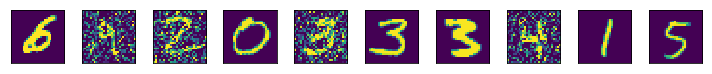

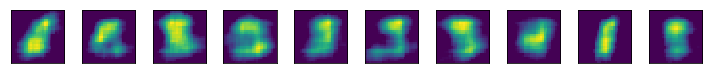

Epoch 1/2, Loss: 0.21902 Acc: 0.79810 Val Loss: 0.20269 Val Acc: 0.80555
Mean Encoded: 0.20809813


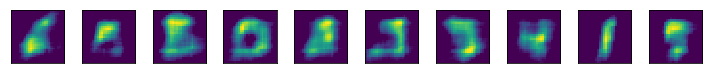

Epoch 2/2, Loss: 0.20536 Acc: 0.79934 Val Loss: 0.19842 Val Acc: 0.79528
Mean Encoded: 0.23897167


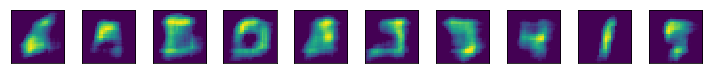

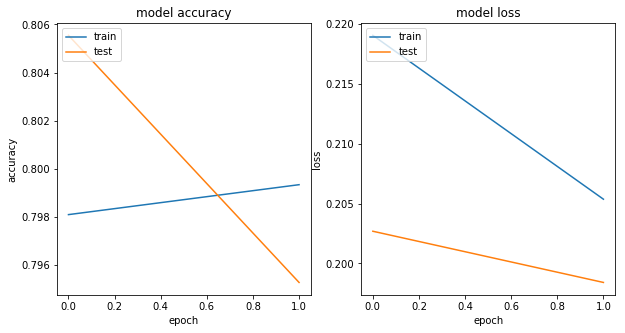

In [4]:
# Fit data with regular training, as well as noisy training sets
reload(utils)
N = batches.N
#N = 1000
epochs = 2
from keras.callbacks import History 
history = History()
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
callback = utils.VisualCallback(model_encoder, model_decoder, history, val_batches, 100)
model.fit_generator(batches, N, epochs, verbose=0, callbacks=[history, callback]);

In [6]:
reload(utils)
utils.save_model(model, "models/convolutional_autoencoder.autoencoder")
utils.save_model(model_encoder, "models/convolutional_autoencoder.encoder")
utils.save_model(model_decoder, "models/convolutional_autoencoder.decoder")

Model saved: models/convolutional_autoencoder.autoencoder.model.json
Weights saved: models/convolutional_autoencoder.autoencoder.weights.h5
Model saved: models/convolutional_autoencoder.encoder.model.json
Weights saved: models/convolutional_autoencoder.encoder.weights.h5
Model saved: models/convolutional_autoencoder.decoder.model.json
Weights saved: models/convolutional_autoencoder.decoder.weights.h5
